# Results Management

### Imports

In [1]:
import sys
import os
import numpy
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../')))
import gillespy2

### Model Instantiation

Model must include rates, species, and reactions

In [2]:
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [3]:
model = MichaelisMenten()


### Creating A Results Object

Create a Results object using model.run():

In [4]:
results = model.run(number_of_trajectories=3)

You can also create a Results object using Results.average_ensemble() and Results.stddev_ensemble() methods.

In [5]:
results_avg = results.average_ensemble()
results_stddev = results.stddev_ensemble()

### Accessing Data In A Results Object

Trajectory data is stored in Results.data, a list of Trajectory objects. Attributes of the first Trajectory can be accessed directly, but a warning will occur if there are more than one Trajectory objects in the list.

In [6]:
print(results[0].solver_name)

SSACSolver


### Combining Results Objects

If two Results objects are created from equivalent models, their Trajectory lists can be combined using the + operator.

In [7]:
%time results2 = model.run(number_of_trajectories=2)
results3 = results + results2
print("Number of trajectories in results3: ",len(results3.data))

CPU times: user 4.55 ms, sys: 11.5 ms, total: 16.1 ms
Wall time: 1.56 s
Number of trajectories in results3:  5


### Displaying Results

Results objects offer methods for displaying results and standard deviation range using matplotlib and plotplotly.

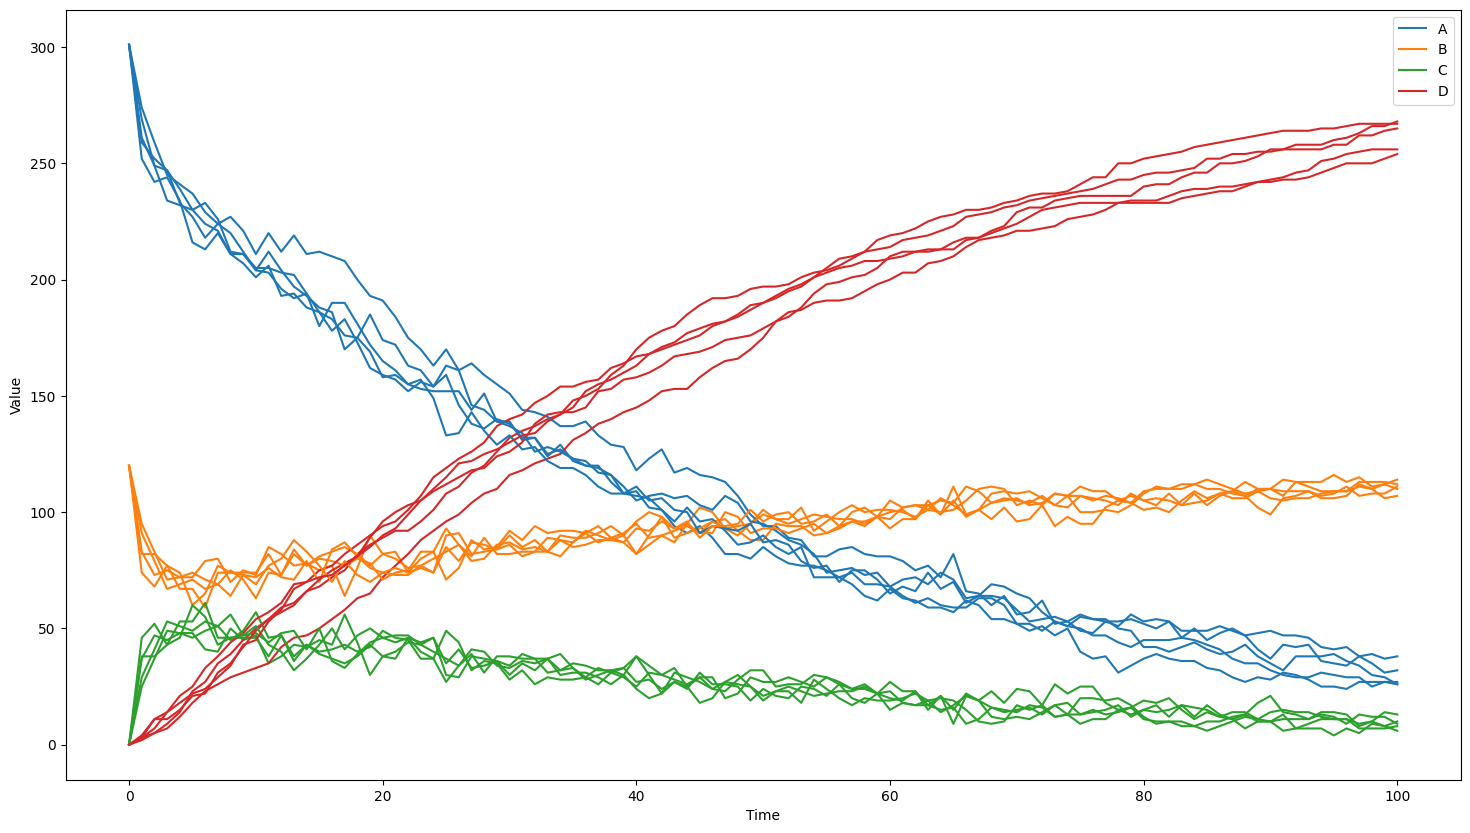

In [8]:
results3.plot()

### Exporting Results to CSV using to_csv

Creates a timestamped local directory and writes the results data to .csv file(s) in that directory. For an ensemble result, to_csv creates one file for each trajectory.

path is a path to the location your directory of csv files will be created (e.g. '/home/user/model_results' will create a directory of csv files in the home/user/model_results directory). Leave it out to default to the model's directory.

nametag is a string parameter to tag your directory and .csv files. Leave it out to default to the model name and solver.

stamp is a string parameter that stamps the directory only. Leave it out to default to a timestamp.

Run model with single trajectory.

In [9]:
resultSingle = model.run(number_of_trajectories=1)


Executing to_csv with the parameters in the next cell will create the following directory and file:

./example_nametagexample_stamp/example_nametag.csv

Uncomment to generate csv file

In [10]:
#resultSingle.to_csv(path='.',nametag='example_nametag',stamp='example_stamp')

Run model with multiple trajectories.

In [11]:
resultsMultiple = model.run(number_of_trajectories=3)

Executing to_csv with the parameters in the next cell will create the following directory and files:
./example2_nametagexample2_stamp/
./example2_nametagexample2_stamp/example2_nametag0.csv
./example2_nametagexample2_stamp/example2_nametag1.csv
./example2_nametagexample2_stamp/example2_nametag2.csv

Uncomment to generate csv file

In [12]:
#resultsMultiple.to_csv(path='.',nametag='example2_nametag',stamp='example2_stamp')

### A more complete list of arguments for each of the above methods can be found [in the documentation](https://stochss.github.io/GillesPy2/classes/gillespy2.core.html#gillespy2.core.results.Results).

### Using Pickle

Commented lines will create and load from binary files instead of a bytes object.

In [13]:
import pickle
results_pickled = pickle.dumps(results3)
#pickle.dump(results,open("filename.p", "wb" ) )
results_unpickled = pickle.loads(results_pickled)
#results_unpickled = pickle.load(open("filename.p", "rb" ) )

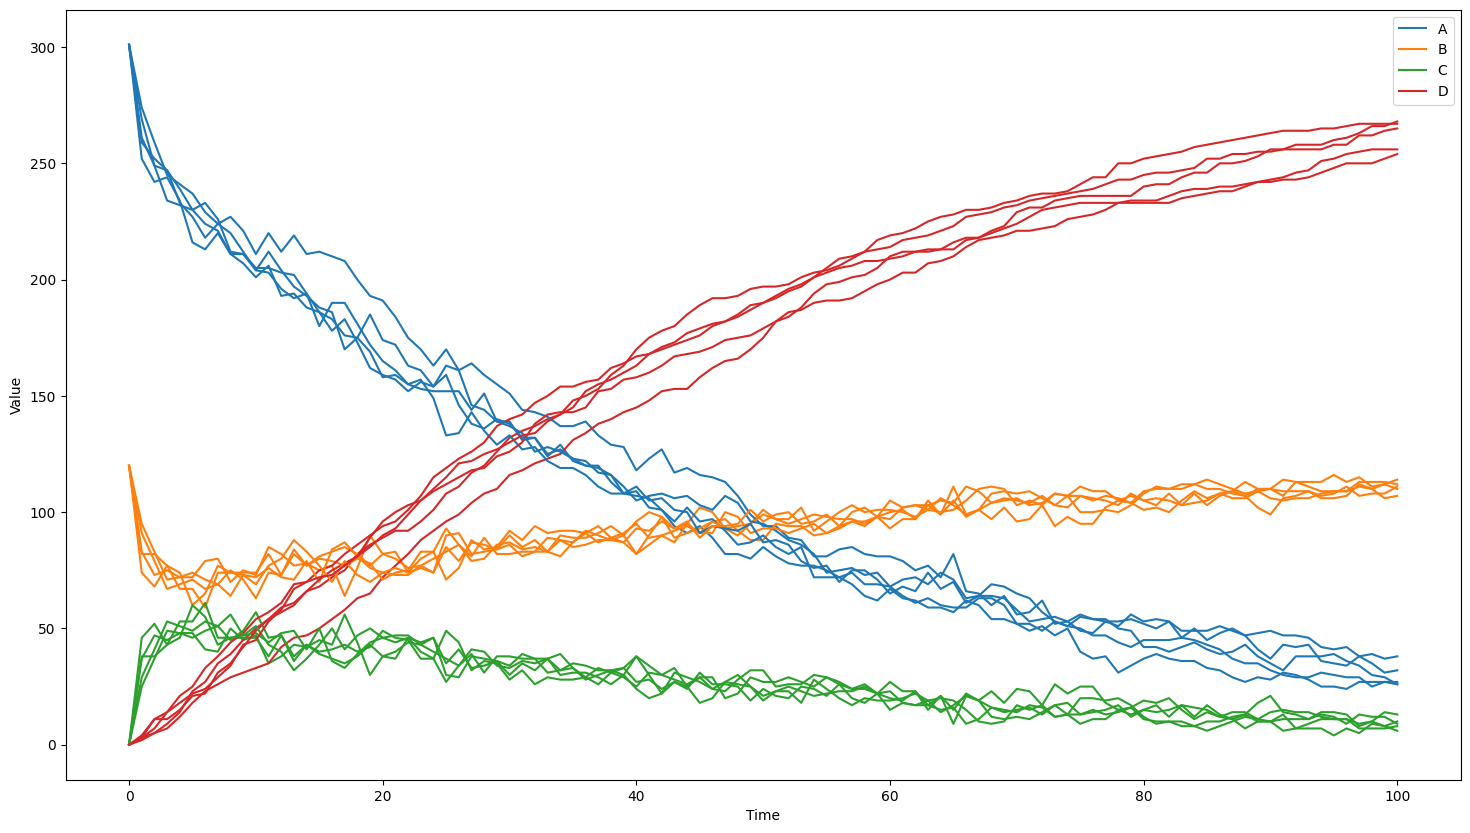

In [14]:
results_unpickled.plot()